# Semana 4 | Boosting

Qué es boosting? Boosting es un técnica que se usa en ensambles de modelos para **reforzar** el aprendizaje de modelos de base, que *a priori* consideramos que son malos aprendedores o aprendedores débiles. Esto quiere decir que estos modelos captan algo de la señal informativa en los datos, o en alguna región de los datos, aun cuando no puedan generalizar bien al conjunto de *todos* los datos.

Hay muchos métodos de aprendizaje que nos pueden servir como modelos de base. Arboles de decisión son los más comunes, pero no los únicos.

En este notebook vamos a usar diferentes métodos de Boosting en tareas de clasificacion (prediccion de etiquetas) y regresión (predicción de valores continuos).

**Referencias:**

  - [SciKit Learn: Ensemble Methods](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.ensemble)

In [3]:
from xgboost import XGBClassifier

In [ ]:
# @title Celdas preparatorias
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from scipy.stats import norm, multivariate_normal

#Ahora las funciones utiles de sklearn para preprocesar datos y armar un pipeline
from sklearn.pipeline import Pipeline
import sklearn.preprocessing as pp

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score, mean_squared_error

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

# Las estrellas de este notebook
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn import tree
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier, AdaBoostRegressor, GradientBoostingRegressor, GradientBoostingClassifier

from sklearn import datasets

from matplotlib.colors import ListedColormap

def plot_decision_boundary(clf, X, y, axes=[-1.5, 2.45, -1, 1.5], alpha=0.5, contour=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if contour:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", alpha=alpha)
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", alpha=alpha)
    plt.axis(axes)
    plt.xlabel(r"$x_1$", fontsize=18)
    plt.ylabel(r"$x_2$", fontsize=18, rotation=0)

## Preparar (hacer) nuestros datos: make moons

Hagamos un dataset sintético con `make_moons` y apliquemosle algo de ruido, para que no sea tan fácil. Esto ya lo hicimos en clases pasadas.

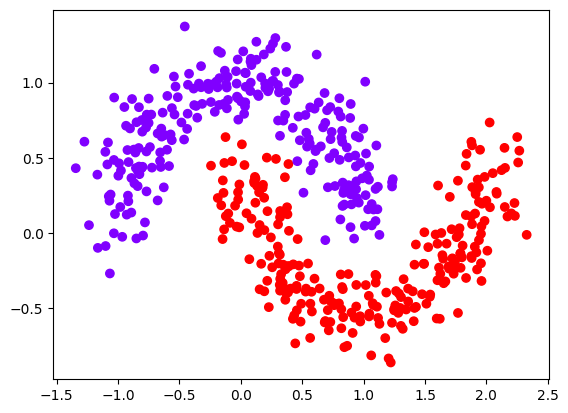

In [ ]:
from sklearn.datasets import make_moons
X, t = make_moons(n_samples=500, noise=0.15, random_state=42)

plt.scatter(X[:,0], X[:,1], c=t+5, cmap='rainbow')

X_train, X_test, y_train, y_test = train_test_split(X, t, random_state=42)

## AdaBoost Classifier

### SAMME vs SAMME.R

Discrete SAMME AdaBoost adapts based on errors in predicted class labels whereas real SAMME.R uses the predicted class probabilities.

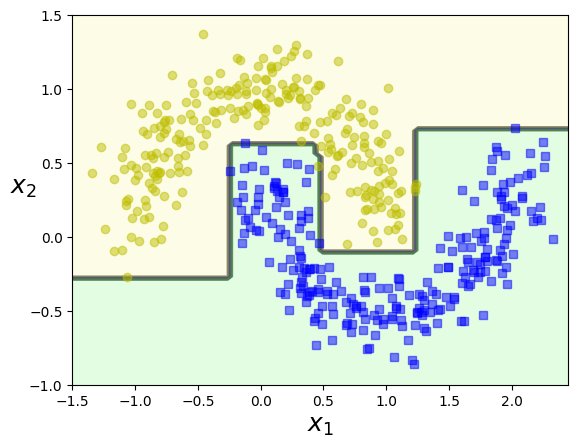

In [ ]:
ne = 50 # number of estimators
# en boosting = numero de etapas de boosting
# en random forest / extra trees = numero de arboles en el bosque


ada_clf = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth = 1), # esto es un stump = weak learner
    n_estimators = ne,
    algorithm = "SAMME", learning_rate = 0.5, random_state = 42
    #algorithm = "SAMME.R", learning_rate = 0.5, random_state = 42
)

ada_clf.fit(X_train,y_train)
plot_decision_boundary(ada_clf, X, t)

In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(ada_clf, X, t, cv=5, scoring='accuracy')

In [ ]:
print(scores.mean())
print(scores.std())

0.982
0.014696938456699083


## Comparacion con ExtraTrees

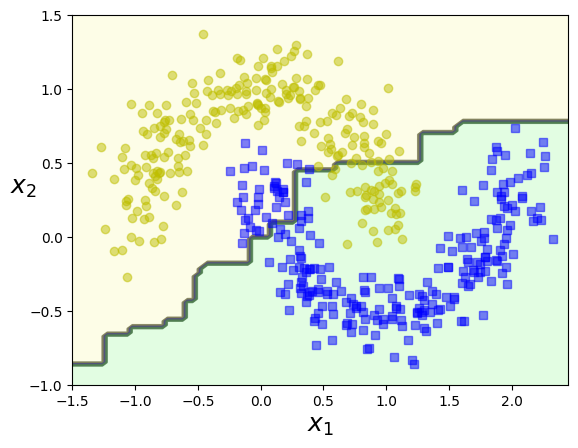

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
etc_clf = ExtraTreesClassifier(n_estimators = ne, max_depth = 1, max_features=1)
etc_clf.fit(X_train, y_train)
plot_decision_boundary(etc_clf, X, t)

In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(etc_clf, X, t, cv=5, scoring='accuracy')

In [ ]:
print(scores.mean())
print(scores.std())

0.8559999999999999
0.039293765408777034


## Comparacion con RandomForests

Aprendizaje paralelo: boostrap + aggregation (bagging)

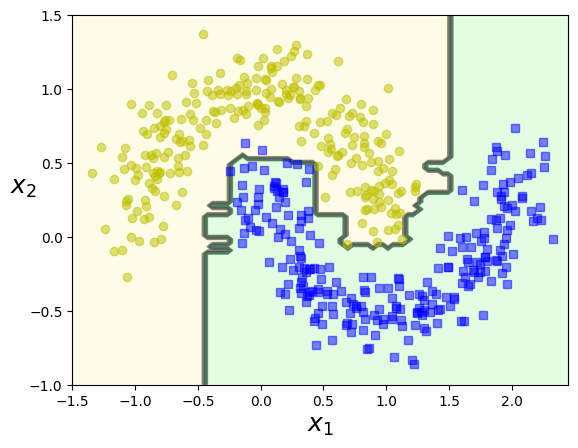

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(n_estimators = ne, max_depth = 7, random_state = 42)
rf_clf.fit(X_train, y_train)
plot_decision_boundary(rf_clf, X, t)

In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(rf_clf, X, t, cv=5, scoring='accuracy')

In [ ]:
print(scores.mean())
print(scores.std())

0.982
0.011661903789690611


## Comparacion con Gradient Boosting

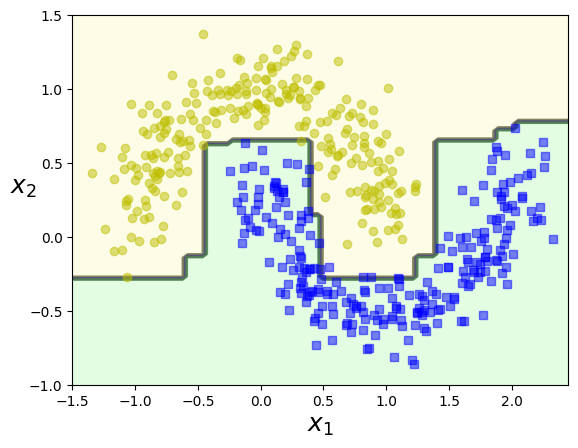

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gb_clf = GradientBoostingClassifier(n_estimators = ne, learning_rate = 1.0,
                                    max_depth = 1, random_state = 42)
gb_clf.fit(X_train, y_train)
plot_decision_boundary(gb_clf, X, t)


In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(gb_clf, X, t, cv=5, scoring='accuracy')


In [ ]:
print(scores.mean())
print(scores.std())

0.9879999999999999
0.009797958971132722


## Comparacion con XGBoost

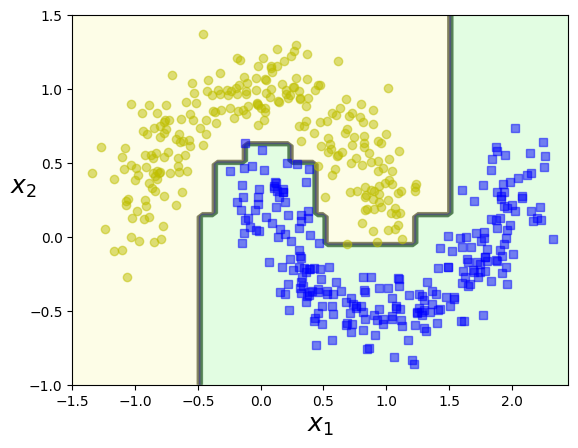

In [ ]:
import xgboost as xgb
xgb_clf = xgb.XGBClassifier(objective ='binary:logistic', n_estimators = ne)
xgb_clf.fit(X_train, y_train)
plot_decision_boundary(xgb_clf, X, t)

In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(xgb_clf, X, t, cv=5, scoring='accuracy')


In [ ]:
print(scores.mean())
print(scores.std())

0.9879999999999999
0.009797958971132722


# Pasemos a tareas de Regresión

## Análisis con datos más complejos (California Housing Dataset 1990)

Vamos a analizar ahora el dataset de casas de California, dataset clásico en ciencia de datos. Como recordatorio, acá van las variables de este dataset:

### About this file
 1. `longitude`: A measure of how far west a house is; a higher value is farther west
 2. `latitude`: A measure of how far north a house is; a higher value is farther north
 3. `housingMedianAge`: Median age of a house within a block; a lower number is a newer building
 4. `totalRooms`: Total number of rooms within a block
 5. `totalBedrooms`: Total number of bedrooms within a block
 6. `population`: Total number of people residing within a block
 7. `households`: Total number of households, a group of people residing within a home unit, for a block
 8. `medianIncome`: Median income for households within a block of houses (measured in tens of thousands of US Dollars)
 9. `medianHouseValue`: Median house value for households within a block (measured in US Dollars)
 10. `oceanProximity`: Location of the house with respect to ocean/sea

Referencia: [California Housing Data Set Description](https://developers.google.com/machine-learning/crash-course/california-housing-data-description)

### Carguemos los datos

In [ ]:
# Conectar Drive a Colab
from google.colab import drive
import os

# Montar drive
drive.mount("/content/drive/")
# Cambiar directorio
os.chdir('/content/drive/MyDrive/Colab Notebooks/Data/')

Mounted at /content/drive/


In [ ]:
import pandas as pd
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

california_housing = pd.read_csv('housing.zip', compression = 'zip')

### Exploremos los datos

In [ ]:
california_housing.head(8)

In [ ]:
california_housing.describe()

In [ ]:
california_housing.count()

### Curemos los datos

La idea de esta parte del ejercicio es insistir en el concepto importante de curar o limpiar los datos. Identificar valores faltantes, outliers, variables redundantes entre sí, etc.

### Valores faltantes

Hay valores faltantes en la variable `total_bedrooms`. Podemos hacer dos cosas: 1) reemplazar los registros con valores faltantes (tirarlos = drop), o 2) reemplazar el valor faltante por la media (promedio). Acá yo elegí esto último.

In [ ]:
california_housing['total_bedrooms'].fillna(california_housing['total_bedrooms'].mean(), inplace=True)

In [ ]:
california_housing.count()


#### Codifiquemos variables categóricas

In [ ]:
# A ver que hay en "ocean_proximity"
california_housing['ocean_proximity'].value_counts()

Transformemos estas variables categóricas en numéricas:

In [ ]:
# nuestras categorias de proximidad ahora son numeros
def transformar_ocean_proximity(proximity):
    if proximity == '<1H mar':
        return 0
    elif proximity == 'Tierra adentro':
        return 1
    elif proximity == 'Cerca mar':
        return 2
    elif proximity == 'Cerca bahía':
        return 3
    elif proximity == 'Isla':
        return 4
california_housing['ocean_proximity'] = california_housing['ocean_proximity'].apply(transformar_ocean_proximity)

In [ ]:
# Y a ver ahora?
california_housing['ocean_proximity'].value_counts()

In [ ]:
# miremos los datos

plt.figure(figsize=(12,6))
corr = california_housing.corr()

# numpy zeros_like: return an array of zeros with the same shape and type as a given array.
mask = np.zeros_like(corr, dtype=bool)

# y esto es para obtener solamente un triangulo de la matriz simétrica
mask[np.triu_indices_from(mask)] = True
sns.heatmap(california_housing.corr(), linewidths=.5, annot = True, mask = mask, cmap = 'PiYG')

#### Removamos variables redundantes

In [ ]:
# hay una obvia correlación (alta) entre viviendas (households) y poblacion (population)
# vamos a remover las viviendas
california_housing.drop('households', axis=1, inplace=True)

In [ ]:
# y hay otra correlación (alta) entre número de ambientes por cuadra y número de habitaciones (para dormir) por cuadra

# asi que las vamos a reemplazar por dos nuevas variables:
# promedio de ambientes por población en la cuadra (block)
# y promedio de habitaciones por población en la cuadra
california_housing['average_rooms']    = california_housing['total_rooms'] / california_housing['population']
california_housing['average_bedrooms'] = california_housing['total_bedrooms'] / california_housing['population']

# asi que vamos a descartar estas variables
california_housing.drop('total_rooms', axis = 1, inplace = True)
california_housing.drop('total_bedrooms', axis = 1, inplace = True)


In [ ]:
# miremos los nuevos datos

plt.figure(figsize=(12,6))
corr = california_housing.corr()

# numpy zeros_like: return an array of zeros with the same shape and type as a given array.
mask = np.zeros_like(corr, dtype=bool)

# y esto es para obtener solamente un triangulo de la matriz simétrica
mask[np.triu_indices_from(mask)] = True
sns.heatmap(california_housing.corr(), linewidths=.5, annot = True, mask = mask, cmap = 'PiYG')

In [ ]:
# veamos los histogramas | las distribuciones de las diferentes variables
california_housing.hist(bins=70, figsize=(15,15))
plt.show()

### Desvio : outliers

In [ ]:
hma = california_housing[ california_housing['housing_median_age'] == 52 ]
hma.count()

In [ ]:
california_housing = california_housing.loc[ california_housing['housing_median_age'] <52,:]

In [ ]:
california_housing = california_housing.loc[ california_housing['median_house_value']<500001,:]

In [ ]:
mhv = california_housing[ california_housing['median_house_value']>50000]
mhv.count()

### Usemos los datos

Carguemos nuestras variables (features: X) y nuestro valor target que queremos predecir (el valor de las casas: y).

In [ ]:
X = california_housing[['longitude', 'latitude', 'housing_median_age',
                        'population', 'median_income', 'ocean_proximity',
                        'average_rooms', 'average_bedrooms']]

y = california_housing['median_house_value']

Partimos el dataset en train + test

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

### Primero regresion lineal, como comparación

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

In [ ]:
y_pred = lr.predict(X_test)

In [ ]:
# R2 score | MAE | MSE
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
r2 = r2_score(y_test,y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print('El R cuadrado de la regresión lineal es:', r2)
print('El error absoluto medio es:', mae)
print('El error cuadrado medio es:', mse)

In [ ]:
# Veamos graficamente las primeras n predicciones
n = 200
grp = pd.DataFrame({'prediccion':y_pred,'real':y_test})
grp = grp.reset_index()
grp = grp.drop(['index'],axis=1)
plt.style.use('ggplot')
plt.figure(figsize=(9,4.5))
plt.plot(grp[:n],linewidth=2)
plt.xlabel('Eventos', fontsize=20)
plt.ylabel('Median House Value', fontsize=20)
plt.legend(['Real','Predicción'],prop={'size': 20})
sns.jointplot(x="real", y="prediccion", data=grp, kind="reg")

### XGBoost

Parámetros del algoritmo:
 - objective:
   - reg:squarederror: regression with squared loss.
   - reg:squaredlogerror: regression with squared log loss
   - reg:logistic: logistic regression.
   - binary:logistic: logistic regression for binary classification, output probability
   - muchos más ...
 - eta (alias learning_rate): shrinks the feature weights to make the boosting process more conservative.
 - max_depth: maxima profundida de los arboles
 - alpha: L1 regularization term on weights. Increasing this value will make model more conservative.
 - lambda: L2 regularization term on weights. Increasing this value will make model more conservative.
 - n_estimators: number of boosting stages
 - booster: Which booster to use. Can be gbtree, gblinear or dart; gbtree and dart use tree based models while gblinear uses linear functions.

Referencia: [XGBoost Documentation.](https://xgboost.readthedocs.io/en/stable/parameter.html)

In [ ]:
import xgboost as xgb
ne = 300 # number of estimators
xr = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 1, eta = 0.3, learning_rate = 0.1, max_depth = 5, alpha = 10, n_estimators = ne)

In [ ]:
xr.fit(X_train,y_train)

y_pred2 = xr.predict(X_test)

In [ ]:
# Veamos graficamente las primeras n predicciones
n = 200
grp = pd.DataFrame({'prediccion':y_pred2,'real':y_test})
grp = grp.reset_index()
grp = grp.drop(['index'],axis=1)
plt.style.use('ggplot')
plt.figure(figsize=(12,6))
plt.plot(grp[:n],linewidth=2)
plt.xlabel('Eventos', fontsize=20)
plt.ylabel('Median House Value', fontsize=20)
plt.legend(['Real','Predicción'],prop={'size': 20})
sns.jointplot(x="real", y="prediccion", data=grp, kind="reg")

In [ ]:
# R2 score | MAE | MSE
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
r2_xgb = r2_score(y_test,y_pred2)
mae_xgb = mean_absolute_error(y_test, y_pred2)
mse_xgb = mean_squared_error(y_test, y_pred2)
print('El R cuadrado de la regresión lineal es:', r2_xgb)
print('El error absoluto medio es:', mae_xgb)
print('El error cuadrado medio es:', mse_xgb)

In [ ]:
xgb.plot_importance(xr)
plt.rcParams['figure.figsize'] = [5, 5]
plt.show()

In [ ]:
#Doing cross validation to see the accuracy of the XGboost model
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

kfold = KFold(n_splits = 10, random_state = 42, shuffle = True)
resultados = cross_val_score(xr, X, y, cv = kfold)
print("Exactitud: %.2f%% (%.2f%%)" % (resultados.mean() * 100, resultados.std() * 100))

Exactitud: 81.59% (1.48%)


In [ ]:
#comparando scores de las dos técnicas (linear regression vs XGBoost)
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt

# MAE = Mean Absolute Error
# RMS = Root Mean Square
mae1 = mean_absolute_error(y_test, y_pred)
rms1 = sqrt(mean_squared_error(y_test, y_pred))
mae2 =mean_absolute_error(y_test, y_pred2)
rms2 = sqrt(mean_squared_error(y_test, y_pred2))

print('Stadisticas para la regresion lineal: \n','MSE:', rms1, '\n R2:', r2,' \n MAE:', mae1 )
print('Stadisticas para xgboost: \n','MSE:', rms2, '\n R2:', r2_xgb,' \n MAE:', mae2 )

# Ejercicios

## Diamonds dataset

El dataset de diamantes tiene más de 50k observaciones de distintos diamantes, con datos sobre:
```
price price in US dollars ($326--$18,823)

carat weight of the diamond (0.2--5.01)

cut quality of the cut (Fair, Good, Very Good, Premium, Ideal)

color diamond colour, from J (worst) to D (best)

clarity a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))

x length in mm (0--10.74)

y width in mm (0--58.9)

z depth in mm (0--31.8)

depth total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)

table width of top of diamond relative to widest point (43--95)
```

Tarea: entrenar varios regresores por distintas técnicas (incluyendo las de boosting) para predecir el valor en dólares de un diamante en base a estos datos.

 - Cuál es el regresor que mejor performance tiene? (qué algoritmo es?)
 - Cuáles son los mejores hiperparámetros para el modelo?
 - Cuál es la performance?

Dataset: [Diamonds data at Kaggle, from the Loose Diamonds Search Engine.](https://www.kaggle.com/datasets/shivam2503/diamonds)
